In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt


## Day 1

In [2]:
with open('day1Input.txt') as f:
    data = f.readlines()

numbers = []
for string in data:
    string = string.split("\n")[0]
    # find the first number
    first = re.search('(\d)', string)

    # Find the last (would be the same as first if only one number)
    last = re.search('(\d)', string[::-1])

    numbers.append(first.group(1)+last.group(1))
    
# Make an array of integers and sum
numbers = np.asarray(numbers, dtype=int)
print(numbers.sum())

55621


Now we try to account also for numbers that are written down 

In [3]:
with open('day1Input.txt') as f:
    data = f.readlines()


# Make a dictionary of all the numbers
numConv = {'one':'1', 'two':'2', 'three':'3', 'four':'4', 'five':'5',
           'six':'6', 'seven':'7', 'eight':'8', 'nine':'9'}




def ReplaceNumbers(string, mapping=numConv):
    '''
    Replaces written numbers with the numerics
    
    INPUT >>>  string = String to check over
               map = Number conversion mapping
              
    OUTPUT >>> string [with all numeric numbers]
    '''
    for word, digit in mapping.items():
        string = re.sub(word, word[0]+digit+word[-1], string, count=0, flags=re.IGNORECASE)
    return string

numbers = []
for string in data:
    string=string.split('\n')[0]
    # convert the numbers to digits
    string = ReplaceNumbers(string)

    # find the first number
    first = re.search('(\d)', string)

    # Find the last (would be the same as first if only one number)
    last = re.search('(\d)', string[::-1])
    numbers.append(first.group(1)+last.group(1))
    
# Make an array of integers and sum
numbers = np.asarray(numbers, dtype=int)


## Day 2

In [4]:
# Dictionary of actual max ball numbers
maxNums = {'red':12,
           'green':13,
           'blue':14}

with open('day2Input.txt') as f:
    data = f.readlines()

# Keep track of legit games
goodGames=[]
for game in data:
    # Find the maximum number of balls shown of each colour in the given game
    redNum = max([int(re.sub(' red', '', string)) for string in re.findall(r'(\d+ red)', game)])
    greenNum = max([int(re.sub(' green', '', string)) for string in re.findall(r'(\d+ green)', game)])
    blueNum = max([int(re.sub(' blue', '', string)) for string in re.findall(r'(\d+ blue)', game)])

    # If all of these maximums are less than the max allowed then the game is legit and store the game id
    if (redNum<=maxNums['red'])&(greenNum<=maxNums['green'])&(blueNum<=maxNums['blue']):
        goodGames.append(int(re.search('(Game \d+)', game).group(1).replace('Game ', '')))

print(f'{len(goodGames)} possible legit games with summed ids to {sum(goodGames)}')


46 possible legit games with summed ids to 2283


Now we find the fewest number of cubes of each colour that could have made the game possible

In [5]:
with open('day2Input.txt') as f:
    data = f.readlines()

cubePower=[]
for game in data:
    # Find the maximum number of balls shown of each colour in the given game
    # This max number is also the fewest needed of that colour
    redNum = max([int(re.sub(' red', '', string)) for string in re.findall(r'(\d+ red)', game)])
    greenNum = max([int(re.sub(' green', '', string)) for string in re.findall(r'(\d+ green)', game)])
    blueNum = max([int(re.sub(' blue', '', string)) for string in re.findall(r'(\d+ blue)', game)])

    # Append the product of these values
    cubePower.append(redNum*greenNum*blueNum)

print(f'Sum of cube power is {sum(cubePower)}')
    

Sum of cube power is 78669


## Day 3

In [6]:
def FindSymbols(string, pattern=r'[^\d.]'):
    '''
    Finds special symbols (not digits or periods)
    in a string.

    Returns True if symbol found
    '''
    matches = re.finditer(pattern, string)
    if len([m.group() for m in matches])!=0:
        return True
    else:
        return False


# Read in the data without the line breaks at the end
data = np.array([re.sub('\n', '', line) for line in open('day3Input.txt')])
# data = np.array([re.sub('\n', '', line) for line in open('day3Test')])

nums=[]
# Loop through every line and find adjacent numbers
for i, line in enumerate(data):
    # Find numbers in current line
    numbers = re.finditer(r'(\d+)', line)
    # if at first line only look to line 2
    if i==0:
        # look at the indices surrounding each number
        for N in numbers:
            # Set the start and end points
            if N.start()==0: start=N.start()
            else: start=N.start()-1
            if N.end()==len(line)-1: end=N.end()
            else: end=N.end()+1

            # If found in next to number, add to list and skip to next number
            if FindSymbols(line[start:end]):
                nums.append(N.group())
                continue

            elif FindSymbols(data[i+1][start:end]):
                nums.append(N.group())
    
    # If at final line only look at line before and current one 
    elif i==len(data)-1:
        # look at the indices surrounding each number
        for N in numbers:
            # Set the start and end points
            if N.start()==0: start=N.start()
            else: start=N.start()-1
            if N.end()==len(line)-1: end=N.end()
            else: end=N.end()+1

            # If found in next to number, add to list and skip to next number
            if FindSymbols(data[i-1][start:end]):
                nums.append(N.group())
                continue
            
            elif FindSymbols(line[start:end]):
                nums.append(N.group())
                
            
    # Else look at the line above and below
    else:
        # look at the indices surrounding each number
        for N in numbers:
            # Set the start and end points
            if N.start()==0: start=N.start()
            else: start=N.start()-1
            if N.end()==len(line)-1: end=N.end()
            else: end=N.end()+1

            # If found in next to number, add to list and skip to next number
            if FindSymbols(data[i-1][start:end]):
                nums.append(N.group())
                continue

            elif FindSymbols(line[start:end]):
                nums.append(N.group())
                continue
            
            elif FindSymbols(data[i+1][start:end]):
                nums.append(N.group())
                

nums = np.asarray(nums, dtype=int)

print(f'Sum of all part numbers in engine scheme is {sum(nums)}')
print(nums)

Sum of all part numbers in engine scheme is 522726
[501 168 202 ... 855 261  42]


Now we search for "gears" which are exactly 2 numbers around an *

We then compute the gear "ratio" (product of numbers)

Finally we sum these gear ratios

In [7]:
def CalcDist(centre, pos):
    '''
    Computes the distance between numbers and an astreix
    '''
    return np.sqrt(np.sum((pos-centre)**2, axis=1))


# Read in the data without the line breaks at the end
data = np.array([re.sub('\n', '', line) for line in open('day3Input.txt')])
# data = np.array([re.sub('\n', '', line) for line in open('day3Test')])

nums=[]; startPos=[]; endPos=[]
astrx=[]
for i, line in enumerate(data):
    # Find centers
    astrx.extend([[a.start(),i] for a in re.finditer(r'(\*)', line)])
    
    # Find numbers and coords
    nums.extend([int(N.group()) for N in re.finditer(r'(\d+)', line)])
    startPos.extend([N.start(),i] for N in re.finditer(r'(\d+)', line))
    endPos.extend([N.end()-1,i] for N in re.finditer(r'(\d+)', line))

# Make array for ease
nums=np.asarray(nums).flatten()
astrx = np.asarray(astrx)
startPos = np.asarray(startPos)
endPos = np.asarray(endPos)

gr=[]
for a in astrx:
    # Calculate distance to start of number and end
    startDist=CalcDist(a, startPos)
    endDist=CalcDist(a, endPos)

    # Find where numbers are close to astrix 
    numIndex = np.where((startDist<2)|(endDist<2))
    gear = nums[numIndex]

    # If exactly two numbers next to astrix find gear ratio
    if len(gear)==2:
        gr.append(gear[0]*gear[1])

print(f'Sum of gear ratios is {sum(gr)}')

Sum of gear ratios is 81721933


## Day 4

In [8]:
# Load the data 
data = np.array([re.sub('\n', '', line) for line in open('day4Input.txt')])
# data = np.array([re.sub('\n', '', line) for line in open('day4Test')])



pointsPerCard=[]
for line in data:
    # Remove unnecessary characters and split winning nums and card nums
    line = re.sub(r'(Card\s+\d+\:\s+)', '', line)
    line = re.sub(r'(\s+\|\s+)', '|', line)
    line = re.sub(r'(\s+)', ' ', line)
    
    # Split into two arrays
    winNums = np.asarray(line.split('|')[0].split(' '), dtype=int); myNums = np.asarray(line.split('|')[1].split(' '), dtype=int)


    # find how many my nums in winning nums
    number = sum(np.isin(myNums, winNums))

    # points on the card is then 1 X 2^(number of match)
    pointsPerCard.append(int(2.**((number-1))))
    
print(f'Total number of points {sum(pointsPerCard)}')

Total number of points 17803


Now we change the points to number of cards where you get an extra scratcher for every winning number

In [9]:
# Load the data 
data = np.array([re.sub('\n', '', line) for line in open('day4Input.txt')])
# data = np.array([re.sub('\n', '', line) for line in open('day4Test')])

# First split into a dictionary for the card number, winning numbers, card numbers and number of wins
cards = {}
for line in data:
    cardNum = re.sub(r'(Card\s+)', '', re.findall(r'(Card\s+\d+\:\s+)', line)[0])
    cardNum = int(re.sub(r'\:\s+', '', cardNum))

    # Remove unnecessary characters and split winning nums and card nums
    line = re.sub(r'(Card\s+\d+\:\s+)', '', line)
    line = re.sub(r'(\s+\|\s+)', '|', line)
    line = re.sub(r'(\s+)', ' ', line)
    
    # Split into two arrays
    winNums = np.asarray(line.split('|')[0].split(' '), dtype=int); myNums = np.asarray(line.split('|')[1].split(' '), dtype=int)

    # find how many my nums in winning nums
    number = sum(np.isin(myNums, winNums))

    # How many cards we start with
    cardCount=1

    # Append to dictionary and start a card count for every number
    cards[cardNum] = [winNums, myNums, int(number), int(cardCount)]

print(cards.keys())
# Now loop through all of the cards and find the winning tickets
for N, items in cards.items():
    # Look at number of wins
    numOfWins = items[2]
    numOfCards = items[3]

    print(f'Card {N}')
    print(f'number of wins: {numOfWins}')
    print(f'Number of cards: {numOfCards}\n')
    # Make an step array up to num and multiple by the number of cards of this number
    # Doing this allows us to find how many extra tickets we get 
    extras = np.arange(N+1, N+numOfWins+1)

    # Index all extra cards and increase their number
    for card in extras:
        if card in cards.keys():
            cards[card][-1]+=1*numOfCards

# Finds the total number of cards
totalCards=0
for value in cards.values(): totalCards+=value[-1]


print(f'You result in {totalCards} scratch cards')

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194])
Card 1
number of wins: 7
Number of cards: 1

Card 2
number of wins: 10
Number of cards: 2

Card 3
number of wins: 2
Number of 

## Day 5

In [10]:
def read_maps_from_file(filename):
    '''
    Function to read in the data file and split it up into a dictionary of the mappings'''
    with open(filename, 'r') as file:
        content = file.read()

    # Splitting the content into sections
    sections = content.split('\n\n')
    seedIDs = np.asarray(sections[0].replace('seeds: ', '').split(), dtype='int64')

    # Dictionary to store the results
    maps_dict = {}

    for section in sections:
        lines = section.split('\n')
        if len(lines) > 1:  # Check if there is more than one line in the section
            map_name = lines[0].replace(' map:', '').replace('-', '_')  # Format the map name
            map_data = np.array([list(map(int, line.split())) for line in lines[1:]])  # Convert lines into 2D array

            maps_dict[map_name] = map_data

    return maps_dict, seedIDs

# Use the function
filename = 'day5Input.txt'  
maps, seeds = read_maps_from_file(filename)
print(maps)
print(seeds)
print()
locations=[]
for seed in seeds:
    print(seed)
    # For each seed find the soil then the fert etc...
    point = seed
    for key, item in maps.items():
        # Which code line to use 
        index = (point>=item[:,1])&(point<item[:,1]+item[:,2])

        if not any(index):
            # If number not in any ranges it stays the same
            continue
        
        else:
            # If number in range then find conversion
            convert = item[index][0]
            
            # find difference from start
            diff = point-convert[1]

            # new point is from conversion
            point = convert[0] + diff


    locations.append(point)

print(f'Min starting position: {min(locations)}')

{'seed_to_soil': array([[1953514507, 1808056938,  198190267],
       [3721110896, 2006247205,  109062451],
       [1046714200, 3920284337,  339096560],
       [ 965003502, 2389762347,   16609477],
       [1946017538,  563731936,    3971811],
       [2151704774, 1532707249,  120594830],
       [1385810760,    3525158,  560206778],
       [1949989349,          0,    3525158],
       [3830173347, 2115309656,  274452691],
       [         0,  567703747,  902873308],
       [2272299604, 2471473045, 1448811292],
       [ 902873308, 1470577055,   62130194],
       [ 981612979, 2406371824,   65101221],
       [4104626038, 1653302079,  154754859]], dtype=int64), 'soil_to_fertilizer': array([[ 131659986,          0,  297180572],
       [  86587273,  297180572,   45072713],
       [1582904051, 2761968868,  319965883],
       [2557550592,  597853135,  123775334],
       [3043086384, 1215510442,   38848367],
       [2396751907,  437054450,  160798685],
       [2705233686, 1278266569,  337852698],
 

Now the seed numbers actually represent ranges (in pairs)

In [34]:
from tqdm import tqdm

In [2]:
def read_maps_from_file(filename):
    '''
    Function to read in the data file and split it up into a dictionary of the mappings'''
    with open(filename, 'r') as file:
        content = file.read()

    # Splitting the content into sections
    sections = content.split('\n\n')
    seedIDs = np.asarray(sections[0].replace('seeds: ', '').split(), dtype='int64')

    # Dictionary to store the results
    maps_dict = {}

    for section in sections:
        lines = section.split('\n')
        if len(lines) > 1:  # Check if there is more than one line in the section
            map_name = lines[0].replace(' map:', '').replace('-', '_')  # Format the map name
            map_data = np.array([list(map(int, line.split())) for line in lines[1:]])  # Convert lines into 2D array

            maps_dict[map_name] = map_data

    return maps_dict, seedIDs

# Use the function
filename = 'day5Test'
# filename = 'day5Input.txt'  

maps, seedpairs = read_maps_from_file(filename)

def FindLocation(seed, maps=maps):
    '''
    Converts seed ID to location id
    '''
    # For each seed find the soil then the fert etc...
    point = seed
    track = [point]
    for key, item in maps.items():
        # Which code line to use 
        index = (point>=item[:,1])&(point<item[:,1]+item[:,2])

        if not any(index):
            # If number not in any ranges it stays the same
            track.append(point)
            continue
        
        else:
            # If number in range then find conversion
            convert = item[index][0]
            
            # find difference from start
            diff = point-convert[1]

            # new point is from conversion
            point = convert[0] + diff

            track.append(point)

    return np.asarray(track)
# Vectorise Function
# FindLocation = np.vectorize(FindLocation)

seedpairs = np.vstack((seedpairs[::2], seedpairs[1::2])).T
fig = plt.figure()
track = []
for start, r in seedpairs:
    seeds = np.arange(start, start+r)
    for seed in seeds:
        track.append(FindLocation(seed))

track = np.asarray(track)
locs=[]
# for start, r in tqdm(seedpairs):    
#     seeds = np.arange(start, start+r, int(r/10000))
#     locs.append(min(FindLocation(seeds)))
    
#     plt.scatter(seeds, FindLocation(seeds))

<Figure size 640x480 with 0 Axes>

In [3]:
track=np.asarray(track)

In [8]:
print(maps)

{'seed_to_soil': array([[50, 98,  2],
       [52, 50, 48]]), 'soil_to_fertilizer': array([[ 0, 15, 37],
       [37, 52,  2],
       [39,  0, 15]]), 'fertilizer_to_water': array([[49, 53,  8],
       [ 0, 11, 42],
       [42,  0,  7],
       [57,  7,  4]]), 'water_to_light': array([[88, 18,  7],
       [18, 25, 70]]), 'light_to_temperature': array([[45, 77, 23],
       [81, 45, 19],
       [68, 64, 13]]), 'temperature_to_humidity': array([[ 0, 69,  1],
       [ 1,  0, 69]]), 'humidity_to_location': array([[60, 56, 37],
       [56, 93,  4]])}


98 50
100 52
50 52
98 100

15 0
52 37
52 37
54 39
0 39
15 54

53 49
61 57
11 0
53 42
0 42
7 49
7 57
11 61

18 88
25 95
25 18
95 88

77 45
100 68
45 81
64 100
64 68
77 81

69 0
70 1
0 1
69 70

56 60
93 97
93 56
97 60

46


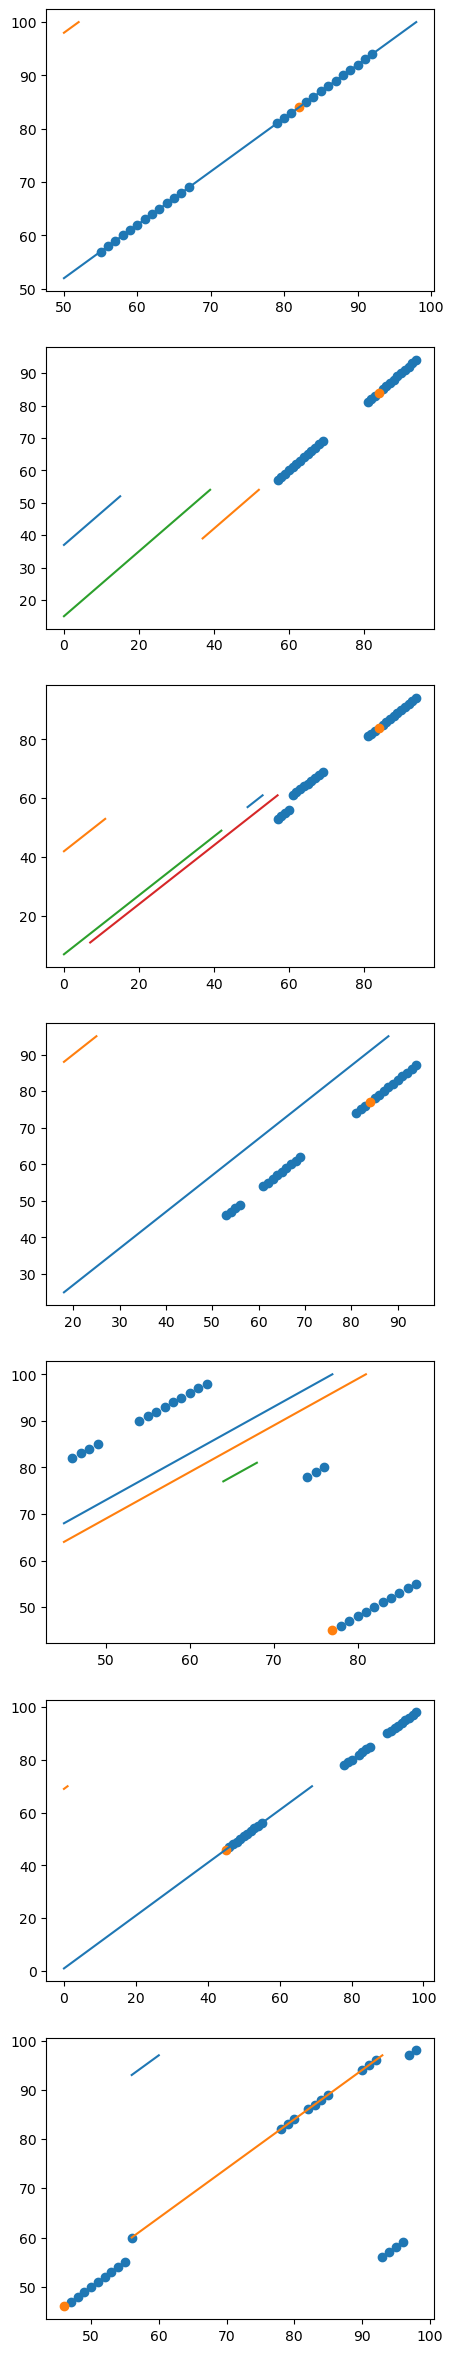

In [10]:
fig, axs = plt.subplots(7,1, figsize=(5, 30))

minimum = np.where(track[:,-1]==min(track[:,-1]))
notmin = np.where(track[:,-1]!=min(track[:,-1]))
for j, (key, items) in enumerate(maps.items()):
    axs[j].scatter(track[notmin,j], track[notmin,j+1])
    axs[j].scatter(track[minimum,j], track[minimum,j+1])
    for i in items:
        print(i[1],i[0])
        print(i[1]+i[2], i[0]+i[2])
        axs[j].plot([i[1], i[0]], [i[1]+i[2], i[0]+i[2]])
    print()

print(min(track[:,-1]))

The minimum must be a boundary on at least one map since otherwise it necessarily cannot be a minimum

In [88]:
maps

{'seed_to_soil': array([[50, 98,  2],
        [52, 50, 48]]),
 'soil_to_fertilizer': array([[ 0, 15, 37],
        [37, 52,  2],
        [39,  0, 15]]),
 'fertilizer_to_water': array([[49, 53,  8],
        [ 0, 11, 42],
        [42,  0,  7],
        [57,  7,  4]]),
 'water_to_light': array([[88, 18,  7],
        [18, 25, 70]]),
 'light_to_temperature': array([[45, 77, 23],
        [81, 45, 19],
        [68, 64, 13]]),
 'temperature_to_humidity': array([[ 0, 69,  1],
        [ 1,  0, 69]]),
 'humidity_to_location': array([[60, 56, 37],
        [56, 93,  4]])}